In [ ]:
M=50  # nb of time steps of size dt
N=100000 #nb of stochastic realization
L=100  #nb of sampling point for S
K=100;sigma=0.2;r=0.1;
T=1
dt=T/M;sdt=np.sqrt(dt)

@jit
def option_binomial(S0):
    disc=math.exp(-r*dt)
    #u=(1+math.sqrt(math.exp(sigma**2*dt)-1))/disc
    #d=(1-math.sqrt(math.exp(sigma**2*dt)-1))/disc
    #p=0.5
    alpha=(math.exp(-r*dt)+math.exp((r+sigma**2)*dt))/2
    u=alpha+math.sqrt(alpha**1-1)
    d=1/u
    p=(1/disc-d)/(u-d)
    S=np.empty(M);S[0]=S0
    um=np.empty(M);um[0]=1
    du=np.empty(M);du[0]=1
    for m in range(1,M):
        for n in range(m,0,-1):
            S[n]=u*S[n-1]
        S[0]=d*S[0]
        um[m]=u*um[m-1]
        du[m]=du[m-1]*d/u
    P=np.zeros(M)
    for n in range(M):
        P[n]=K-S[n] if K>S[n] else 0
    for m in range(M-1,0,-1):
        for n in range(m):
            P[n]=(p*P[n+1]+(1-p)*P[n])*disc
            gain=K-S0*um[m]*du[n]
            if gain>P[n]:
                P[n]=gain
    return P[0]

S0=np.arange(10,130)
p_binomial=np.empty(S0.size)
exact=np.empty(S0.size)
for i in range(S0.size):
    p_binomial[i]=option_binomial(S0[i])
    exact[i]=a_option(St=S0[i],r=0.1,otype='put').value_binomial_0(M=100)
exact1=e_option(St=S0,r=0.1,otype='put').value_BSM
plt.plot(S0,p_binomial,label="binomial")
plt.plot(S0,exact,label='for comparison')
plt.plot(S0,exact1,label="Euro put")
plt.legend()
plt.show()

In [1]:
M=500
K=100;sigma=0.2;r=0.1;dt=1.0/M
disc=exp(-r*dt)
u=(1+sqrt(exp(sigma^2*dt)-1))/disc
d=(1-sqrt(exp(sigma^2*dt)-1))/disc
p=0.5
function option_binomial(S0::Float64)
    S=Array{Float64}(M)
    um=Array{Float64}(M)
    du=Array{Float64}(M)
    S[1]=S0;um[1]=1;du[1]=1
    for m=1:M-1
        for n=m:-1:1
            S[n+1]=u*S[n]
        end
        S[1]=d*S[1]
        um[m+1]=u*um[m];du[m+1]=du[m]*d/u
    end
    P=Array{Float64}(M)
    for n=1:M
        P[n]=S[n]>K?0:K-S[n]
    end
    for m=M-1:-1:1
        for n=1:m
            P[n]=(p*P[n+1]+(1-p)*P[n])*disc
            gain=K-S0*um[m]*du[n]
            if gain>P[n]
                P[n]=gain
            end
        end
    end
    return P[1]
end
S0=10.0:130.0
put=Array{Float64}(length(S0))
for i = 1:length(S0)
    put[i]=option_binomial(S0[i])
end


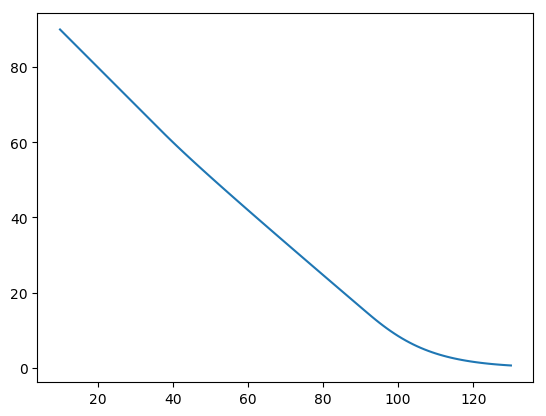

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f835c0915c0>

In [2]:
using PyPlot
plot(S0,put)

In [3]:
put

121-element Array{Float64,1}:
 90.0     
 89.0     
 88.0     
 87.0     
 86.0     
 85.0     
 84.0     
 83.0     
 82.0     
 81.0     
 80.0     
 79.0     
 78.0     
  ⋮       
  1.75275 
  1.60232 
  1.46417 
  1.33661 
  1.22029 
  1.11245 
  1.01549 
  0.925108
  0.843329
  0.767623
  0.698728
  0.635505

In [ ]:
for i in S0 println(i) end

In [ ]:
disc

In [ ]:
S0[8]